## Javad Ranjbar Kermani
## Q-learning algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Q-Learning Method 1

Optimal policy:
[['U' 'L' 'L' 'R' 'R' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'D' 'D' 'D' 'D' 'D']
 ['U' 'D' 'D' 'D' 'D' 'D']
 ['D' 'L' 'L' 'R' 'R' 'D']]


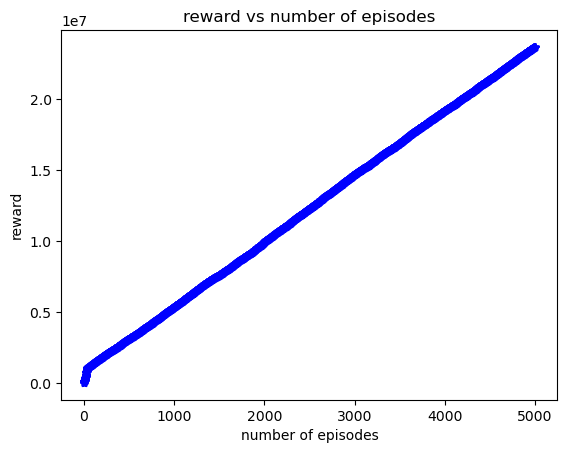

In [2]:
# Constants
START_POSITIONS = [3, 5]
END_POSITION = 24
PENALTY_POSITION = 11,14,23,29 
ROW_REWARD = 5
PENALTY = -5
STEP_PENALTY = -1

# Initialize the Q-table
q_table = np.zeros((36, 4))

# Define the actions (up, down, left, right)
actions = ["U", "D", "L", "R"]

# Define the transition function
def transition(state, action):
    if action == "U":
        return state - 6 if state > 5 else state
    elif action == "D":
        return state + 6 if state < 30 else state
    elif action == "L":
        return state - 1 if state % 6 != 0 else state
    elif action == "R":
        return state + 1 if (state + 1) % 6 != 0 else state

# Define the reward function
def reward(state):
    if state == END_POSITION:
        return ROW_REWARD
    elif state in [0, 5, 30, 35]:
        return ROW_REWARD
    elif state == PENALTY_POSITION:
        return PENALTY
    else:
        return STEP_PENALTY

# Set the learning rate
learning_rate = 0.8

# Set the discount factor
discount_factor = 0.95

# Set the number of episodes
num_episodes = 5000
totalRewards = np.zeros(num_episodes)
epRewards = 0

# Train the Q-table
for i in range(num_episodes):
    for start_position in START_POSITIONS:
        state = start_position
        done = False
        while not done:
            if np.random.uniform(0, 1) < 0.5:
                action = np.random.choice(actions)
            else:
                action = actions[np.argmax(q_table[state])]

            # Take the action
            next_state = transition(state, action)
            reward_value = reward(next_state)

            # Update the Q-value
            q_value = q_table[state][actions.index(action)]
            q_table[state][actions.index(action)] = q_value + learning_rate * (reward_value + discount_factor * np.max(q_table[next_state]) - q_value)

            state = next_state
            epRewards += reward_value
            totalRewards[i] = epRewards

            if state == END_POSITION:
                done = True
#plotting the results            
plt.plot(totalRewards, 'b*')
plt.xlabel('number of episodes')
plt.ylabel('reward')
plt.title('reward vs number of episodes')
# Print the optimal policy
policy = [np.argmax(q_table[i]) for i in range(36)]
policy = [actions[index] for index in policy]
policy = np.array(policy).reshape(6, 6)
print("Optimal policy:")
print(policy)


### Q-Learning Method 2

Optimal policy:
[['U' 'L' 'L' 'R' 'R' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'D' 'D' 'D' 'D' 'D']
 ['U' 'D' 'D' 'D' 'D' 'D']
 ['D' 'L' 'L' 'R' 'R' 'D']]


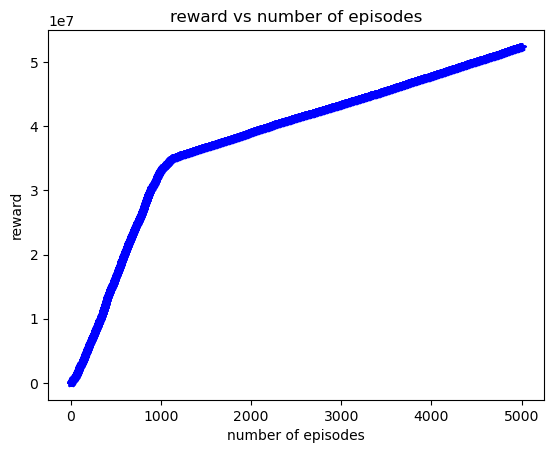

In [3]:
import numpy as np

# Constants
START_POSITIONS = [3, 5]
END_POSITION = 24
PENALTY_POSITION = 16
ROW_REWARD = 5
PENALTY = -5
STEP_PENALTY = -1

# Initialize the Q-table
q_table = np.zeros((36, 4))

# Define the actions (up, down, left, right)
actions = ["U", "D", "L", "R"]

# Define the transition function
def transition(state, action):
    if action == "U":
        return state - 6 if state > 5 else state
    elif action == "D":
        return state + 6 if state < 30 else state
    elif action == "L":
        return state - 1 if state % 6 != 0 else state
    elif action == "R":
        return state + 1 if (state + 1) % 6 != 0 else state

# Define the reward function
def reward(state):
    if state == END_POSITION:
        return ROW_REWARD
    elif state in [0, 5, 30, 35]:
        return ROW_REWARD
    elif state == PENALTY_POSITION:
        return PENALTY
    else:
        return STEP_PENALTY

# Set the learning rate
learning_rate = 0.05

# Set the discount factor
discount_factor = 0.95

# Set the number of episodes
num_episodes = 5000
totalRewards = np.zeros(num_episodes)
epRewards = 0
# Train the Q-table
for i in range(num_episodes):
    for start_position in START_POSITIONS:
        state = start_position
        done = False
        while not done:
            if np.random.uniform(0, 1) < 0.5:
                action = np.random.choice(actions)
            else:
                action = actions[np.argmax(q_table[state])]

            # Take the action
            next_state = transition(state, action)
            reward_value = reward(next_state)

            # Update the Q-value
            q_value = q_table[state][actions.index(action)]
            q_table[state][actions.index(action)] = q_value + learning_rate * (reward_value + discount_factor * np.max(q_table[next_state]) - q_value)

            state = next_state
            epRewards += reward_value
            totalRewards[i] = epRewards
            if state == END_POSITION:
                done = True
                
#plotting the results            
plt.plot(totalRewards, 'b*')
plt.xlabel('number of episodes')
plt.ylabel('reward')
plt.title('reward vs number of episodes')
# Print the optimal policy
policy = [np.argmax(q_table[i]) for i in range(36)]
policy = [actions[index] for index in policy]
policy = np.array(policy).reshape(6, 6)
print("Optimal policy:")
print(policy)
